In [1]:
# Apertura archivos y conversión dataframe
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Apertura archivo .dat.gz
import gzip

# Tratamiento de datos
import numpy as np

#Útil en: comparaciones de variables en análisis de datos, creación de combinaciones para modelos, evaluación de correlaciones entre pares de variables
from itertools import combinations

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paso 1: Descomprimir y leer
file_path = 'files/atus_00004.dat.gz'

# Paso 2: Definir columnas y sus posiciones (inicio, fin)
colspecs = [
    (0, 5), (5, 19), (19, 26), (26, 28), (28, 31),
    (31, 48), (48, 63), (63, 66), (66, 68), (68, 70),
    (70, 73), (73, 76), (76, 78), (78, 80), (80, 82),
    (82, 84), (84, 88), (88, 92), (92, 94), (94, 96),
    (96, 100), (100, 107), (107, 109), (109, 113),
    (113, 117), (117, 121), (121, 125), (125, 129),
    (129, 133), (133, 137), (137, 141), (141, 145),
    (145, 149)
]

# Paso 3: Nombres de columnas
column_names = [
    "YEAR", "CASEID", "SERIAL", "PERNUM", "LINENO",
    "WT06", "WT20", "AGE", "SEX", "MARST",
    "EDUC", "EDUCYRS", "SCHLCOLL", "EMPSTAT", "MULTJOBS",
    "CLWKR", "OCC2", "IND2", "FAMBUS_WRK", "FULLPART",
    "UHRSWORKT", "EARNWEEK", "KIDUND18", "Cuidados",
    "Deporte", "Educacion", "Espiritualidad", "Hogar",
    "Personal", "Socializar", "Trabajo", "Viajando",
    "Voluntariado"
]

# Paso 4: Leer el archivo como archivo de texto plano
with gzip.open(file_path, 'rt') as f:
    atus = pd.read_fwf(f, colspecs=colspecs, names=column_names)

# Mostrar las primeras filas
atus.head()


,YEAR,CASEID,SERIAL,PERNUM,LINENO,WT06,WT20,AGE,SEX,MARST,EDUC,EDUCYRS,SCHLCOLL,EMPSTAT,MULTJOBS,CLWKR,OCC2,IND2,FAMBUS_WRK,FULLPART,UHRSWORKT,EARNWEEK,KIDUND18,Cuidados,Deporte,Educacion,Espiritualidad,Hogar,Personal,Socializar,Trabajo,Viajando,Voluntariado
0,2018,20180101180006,1,1,1,9.456372e+06,NaN,42,1,5,30,214,1,3,99,99,9999,9999,99,99,9999,9999999,0,0,0,0,0,0,540,673,0,45,0
1,2018,20180101180021,2,1,1,4.010486e+06,NaN,58,1,4,21,112,99,5,99,99,9999,9999,99,99,9999,9999999,0,0,0,0,0,70,450,880,0,0,0
2,2018,20180101180025,3,1,1,3.519394e+07,NaN,65,1,1,16,111,99,5,99,99,9999,9999,99,99,9999,9999999,0,0,0,0,0,21,890,349,0,51,0
3,2018,20180101180054,4,1,1,2.251398e+06,NaN,72,1,5,30,112,99,5,99,99,9999,9999,99,99,9999,9999999,0,0,180,0,0,5,630,512,0,90,0
4,2018,20180101180060,5,1,1,1.029459e+06,NaN,66,2,6,30,214,99,2,0,2,150,252,99,2,12,10000,0,0,0,0,300,0,655,155,0,225,0


In [3]:
# Diccionarios de mapeo para algunas columnas
sex_map = {
    1: "Male", 2: "Female", 99: "NIU"
}

marst_map = {
    1: "Married - spouse present",
    2: "Married - spouse absent",
    3: "Widowed",
    4: "Divorced",
    5: "Separated",
    6: "Never married",
    99: "NIU"
}

educ_map = {
    10: "Less than 1st grade",
    11: "1st to 4th grade",
    12: "5th or 6th grade",
    13: "7th or 8th grade",
    14: "9th grade",
    15: "10th grade",
    16: "11th grade",
    17: "12th grade - no diploma",
    20: "High school - GED",
    21: "High school diploma",
    30: "Some college",
    31: "Assoc degree - vocational",
    32: "Assoc degree - academic",
    40: "Bachelor's degree",
    41: "Master's degree",
    42: "Professional degree",
    43: "Doctoral degree",
    999: "NIU"
}

educyrs_map = {
    100: "Grades 1-12",
    101: "Less than first grade",
    102: "First through fourth grade",
    105: "Fifth through sixth grade",
    107: "Seventh through eighth grade",
    109: "Ninth grade",
    110: "Tenth grade",
    111: "Eleventh grade",
    112: "Twelfth grade",
    200: "College",
    213: "College--one year",
    214: "College--two years",
    215: "College--three years",
    216: "College--four years",
    217: "Bachelor's degree",
    300: "Advanced degree",
    316: "Master's degree",
    317: "Master's degree--one year program",
    318: "Master's degree--two year program",
    319: "Master's degree--three+ year program",
    320: "Professional degree",
    321: "Doctoral degree",
    999: "NIU (Not in universe)"
}

empstat_map = {
    1: "Employed - at work",
    2: "Employed - absent",
    3: "Unemployed - on layoff",
    4: "Unemployed - looking",
    5: "Not in labor force",
    99: "NIU"
}

fullpart_map = {
    1: "Full time",
    2: "Part time",
    99: "NIU"
}

multjobs_map = {
    0: "No",
    1: "Yes",
    99: "NIU"
}

kid_map = {
    0: "No",
    1: "Yes",
    99: "NIU"
}

clwkr_map = {
    1: "Government, federal",
    2: "Government, state",
    3: "Government, local",
    4: "Private, for profit",
    5: "Private, nonprofit",
    6: "Self-employed, incorporated",
    7: "Self-employed, unincorporated",
    8: "Without pay",
    99: "NIU"
}

occ2_map = {
    110: "Management",
    111: "Business & financial ops",
    120: "Computer & math science",
    121: "Architecture & engineering",
    122: "Life, physical & social science",
    123: "Community & social service",
    124: "Legal",
    125: "Education, training & library",
    126: "Arts, design, entertainment, sports, media",
    127: "Healthcare practitioner & technical",
    130: "Healthcare support",
    131: "Protective service",
    132: "Food preparation & serving",
    133: "Cleaning & maintenance",
    134: "Personal care & service",
    140: "Sales",
    150: "Office & admin support",
    160: "Farming, fishing, forestry",
    170: "Construction & extraction",
    180: "Installation, maintenance & repair",
    190: "Production",
    200: "Transportation & material moving",
    9999: "NIU"
}

ind2_map = {
    100: "Agriculture",
    101: "Forestry, fishing, hunting",
    110: "Mining",
    120: "Construction",
    130: "Nonmetallic mineral mfg",
    131: "Primary/fabricated metal",
    132: "Machinery mfg",
    133: "Computer & electronics mfg",
    134: "Electrical equip mfg",
    135: "Transportation equip mfg",
    136: "Wood product mfg",
    137: "Furniture mfg",
    138: "Miscellaneous mfg",
    140: "Food mfg",
    141: "Beverage & tobacco mfg",
    142: "Textiles & leather mfg",
    143: "Paper & printing",
    144: "Petroleum & coal",
    145: "Chemical mfg",
    146: "Plastics & rubber",
    150: "Wholesale trade",
    160: "Retail trade",
    170: "Transportation & warehousing",
    180: "Utilities",
    190: "Publishing (non-internet)",
    191: "Film & sound",
    192: "Broadcasting (non-internet)",
    193: "Internet publishing",
    194: "Telecommunications",
    195: "ISP & data services",
    196: "Other info services",
    200: "Finance",
    201: "Insurance",
    210: "Real estate",
    211: "Rental & leasing",
    220: "Professional services",
    230: "Company management",
    231: "Admin & support services",
    232: "Waste management",
    240: "Education",
    250: "Hospitals",
    251: "Health care (non-hospitals)",
    252: "Social assistance",
    260: "Arts & recreation",
    270: "Hotels & accommodation",
    271: "Food services",
    280: "Private households",
    290: "Repair & maintenance",
    291: "Personal & laundry services",
    292: "Membership orgs",
    300: "Public administration",
    9999: "NIU"
}

In [4]:
atus["SEX"] = atus["SEX"].astype(int).map(sex_map)
atus["MARST"] = atus["MARST"].astype(int).map(marst_map)
atus["EDUC"] = atus["EDUC"].astype(int).map(educ_map)
atus["EDUCYRS"] = atus["EDUCYRS"].astype(int).map(educyrs_map)
atus["EMPSTAT"] = atus["EMPSTAT"].astype(int).map(empstat_map)
atus["FULLPART"] = atus["FULLPART"].astype(int).map(fullpart_map)
atus["MULTJOBS"] = atus["MULTJOBS"].astype(int).map(multjobs_map)
atus["KIDUND18"] = atus["KIDUND18"].astype(int).map(kid_map)
atus["CLWKR"] = atus["CLWKR"].astype(int).map(clwkr_map)
atus["OCC2"] = atus["OCC2"].astype(int).map(occ2_map)
atus["IND2"] = atus["IND2"].astype(int).map(ind2_map)



In [5]:
atus.head()

,YEAR,CASEID,SERIAL,PERNUM,LINENO,WT06,WT20,AGE,SEX,MARST,EDUC,EDUCYRS,SCHLCOLL,EMPSTAT,MULTJOBS,CLWKR,OCC2,IND2,FAMBUS_WRK,FULLPART,UHRSWORKT,EARNWEEK,KIDUND18,Cuidados,Deporte,Educacion,Espiritualidad,Hogar,Personal,Socializar,Trabajo,Viajando,Voluntariado
0,2018,20180101180006,1,1,1,9.456372e+06,NaN,42,Male,Separated,Some college,College--two years,1,Unemployed - on layoff,NIU,NIU,NIU,NIU,99,NIU,9999,9999999,No,0,0,0,0,0,540,673,0,45,0
1,2018,20180101180021,2,1,1,4.010486e+06,NaN,58,Male,Divorced,High school diploma,Twelfth grade,99,Not in labor force,NIU,NIU,NIU,NIU,99,NIU,9999,9999999,No,0,0,0,0,70,450,880,0,0,0
2,2018,20180101180025,3,1,1,3.519394e+07,NaN,65,Male,Married - spouse present,11th grade,Eleventh grade,99,Not in labor force,NIU,NIU,NIU,NIU,99,NIU,9999,9999999,No,0,0,0,0,21,890,349,0,51,0
3,2018,20180101180054,4,1,1,2.251398e+06,NaN,72,Male,Separated,Some college,Twelfth grade,99,Not in labor force,NIU,NIU,NIU,NIU,99,NIU,9999,9999999,No,0,180,0,0,5,630,512,0,90,0
4,2018,20180101180060,5,1,1,1.029459e+06,NaN,66,Female,Never married,Some college,College--two years,99,Employed - absent,No,"Government, state",Office & admin support,Social assistance,99,Part time,12,10000,No,0,0,0,300,0,655,155,0,225,0


In [6]:
atus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27810 entries, 0 to 27809
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            27810 non-null  int64  
 1   CASEID          27810 non-null  int64  
 2   SERIAL          27810 non-null  int64  
 3   PERNUM          27810 non-null  int64  
 4   LINENO          27810 non-null  int64  
 5   WT06            19028 non-null  float64
 6   WT20            18217 non-null  float64
 7   AGE             27810 non-null  int64  
 8   SEX             27810 non-null  object 
 9   MARST           27810 non-null  object 
 10  EDUC            27810 non-null  object 
 11  EDUCYRS         27810 non-null  object 
 12  SCHLCOLL        27810 non-null  int64  
 13  EMPSTAT         27810 non-null  object 
 14  MULTJOBS        27810 non-null  object 
 15  CLWKR           27810 non-null  object 
 16  OCC2            27810 non-null  object 
 17  IND2            27810 non-null 

In [7]:
atus[atus["SEX"] == "Female"].shape

(15131, 33)

In [8]:
atus.isna().sum()

YEAR                 0
CASEID               0
SERIAL               0
PERNUM               0
LINENO               0
WT06              8782
WT20              9593
AGE                  0
SEX                  0
MARST                0
EDUC                 0
EDUCYRS              0
SCHLCOLL             0
EMPSTAT              0
MULTJOBS             0
CLWKR                0
OCC2                 0
IND2                 0
FAMBUS_WRK           0
FULLPART             0
UHRSWORKT            0
EARNWEEK             0
KIDUND18             0
Cuidados             0
Deporte              0
Educacion            0
Espiritualidad       0
Hogar                0
Personal             0
Socializar           0
Trabajo              0
Viajando             0
Voluntariado         0
dtype: int64

In [9]:
atus.columns

Index(['YEAR', 'CASEID', 'SERIAL', 'PERNUM', 'LINENO', 'WT06', 'WT20', 'AGE',
       'SEX', 'MARST', 'EDUC', 'EDUCYRS', 'SCHLCOLL', 'EMPSTAT', 'MULTJOBS',
       'CLWKR', 'OCC2', 'IND2', 'FAMBUS_WRK', 'FULLPART', 'UHRSWORKT',
       'EARNWEEK', 'KIDUND18', 'Cuidados', 'Deporte', 'Educacion',
       'Espiritualidad', 'Hogar', 'Personal', 'Socializar', 'Trabajo',
       'Viajando', 'Voluntariado'],
      dtype='object')

In [10]:
# Eliminar columnas que no aportan datos relevantes, por cantidad de nulos, o por info repetida
atus = atus.drop(columns=["SERIAL", "PERNUM", "LINENO", "WT06","WT20","SCHLCOLL","FAMBUS_WRK"])

In [11]:
atus.head()

,YEAR,CASEID,AGE,SEX,MARST,EDUC,EDUCYRS,EMPSTAT,MULTJOBS,CLWKR,OCC2,IND2,FULLPART,UHRSWORKT,EARNWEEK,KIDUND18,Cuidados,Deporte,Educacion,Espiritualidad,Hogar,Personal,Socializar,Trabajo,Viajando,Voluntariado
0,2018,20180101180006,42,Male,Separated,Some college,College--two years,Unemployed - on layoff,NIU,NIU,NIU,NIU,NIU,9999,9999999,No,0,0,0,0,0,540,673,0,45,0
1,2018,20180101180021,58,Male,Divorced,High school diploma,Twelfth grade,Not in labor force,NIU,NIU,NIU,NIU,NIU,9999,9999999,No,0,0,0,0,70,450,880,0,0,0
2,2018,20180101180025,65,Male,Married - spouse present,11th grade,Eleventh grade,Not in labor force,NIU,NIU,NIU,NIU,NIU,9999,9999999,No,0,0,0,0,21,890,349,0,51,0
3,2018,20180101180054,72,Male,Separated,Some college,Twelfth grade,Not in labor force,NIU,NIU,NIU,NIU,NIU,9999,9999999,No,0,180,0,0,5,630,512,0,90,0
4,2018,20180101180060,66,Female,Never married,Some college,College--two years,Employed - absent,No,"Government, state",Office & admin support,Social assistance,Part time,12,10000,No,0,0,0,300,0,655,155,0,225,0


### REVISIÓN COLUMNAS NUMÉRICAS

#### 1. Columna UHRSWORKT, comprobar valores unicos, sustituimos 9999 y 9995 por NaN

In [12]:
atus["UHRSWORKT"].unique()

array([9999,   12,   40,   50,   45,   15,   35,   18,   20,   46,    6,
         30,   32,   42,   60,   56, 9995,   43,   47,   55,   36,    0,
         38,   28,   23,   48,   25,   24,   29,   75,   13,   16,   22,
         44,   10,   66,   37,    8,   84,   54,   34,   70,   58,   27,
         49,    4,   17,    1,    3,   63,   41,   80,   11,   14,   64,
         21,   61,   52,   53,   57,    2,   26,    5,   65,   31,   78,
         95,   33,  113,   76,    7,   90,    9,   99,   68,   39,   19,
         51,   72,   77,   59,   67,   88,   69,   83,   81,   79,   62,
         91,  104,   85,   86,  120,   94,  100,   73,  144,   98,  114,
        124,  140,   82,   92,  105,  110,  106])

In [13]:
atus["UHRSWORKT"].describe()

count    27810.000000
mean      4384.434376
std       4938.814329
min          0.000000
25%         40.000000
50%         52.000000
75%       9999.000000
max       9999.000000
Name: UHRSWORKT, dtype: float64

In [14]:
atus = atus.replace([9999, 9995], np.nan)


In [15]:
atus["UHRSWORKT"].describe()

count    15678.000000
mean        39.983416
std         13.077459
min          0.000000
25%         38.000000
50%         40.000000
75%         45.000000
max        144.000000
Name: UHRSWORKT, dtype: float64

#### 2. Columna EARNWEEK, comprobar valores unicos, sustituimos 9999999 por NaN

In [16]:
atus["EARNWEEK"].value_counts()

EARNWEEK
9999999    13080
288461       928
100000       276
60000        263
115384       232
192307       225
125000       214
80000        183
96153        180
134615       166
50000        162
153846       159
144230       146
173076       138
40000        138
230769       137
30000        129
75000        123
76923        123
150000       122
86538        120
70000        118
105769       113
250000       107
163461       107
120000        97
211538        96
57692         96
45000         95
64000         95
56000         94
92307         93
90000         90
48000         89
72000         88
67307         86
138461        85
52000         83
200000        78
69230         77
25000         75
20000         74
35000         73
68000         73
269230        65
88000         61
182692        59
240384        58
44000         58
15000         57
65000         56
80769         55
84000         54
110000        53
36000         52
103846        50
55000         49
107692        49
18461

In [17]:
atus["EARNWEEK"].describe()

count    2.781000e+04
mean     4.762777e+06
std      4.935587e+06
min      0.000000e+00
25%      8.800000e+04
50%      2.884610e+05
75%      9.999999e+06
max      9.999999e+06
Name: EARNWEEK, dtype: float64

In [18]:
atus = atus.replace(9999999, np.nan)

In [19]:
atus["EARNWEEK"].describe()

count     14730.000000
mean     112209.271419
std       76295.073459
min           0.000000
25%       55000.000000
50%       93461.000000
75%      153846.000000
max      288461.000000
Name: EARNWEEK, dtype: float64

### REVISIÓN COLUMNAS CATEGÓRICAS

In [20]:
# sugerencia de Chatgpt
# IF [COLUMNA] = "NIU" THEN NULL ELSE [COLUMNA] END


In [21]:
atus["SEX"].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
atus["MARST"].unique()

array(['Separated', 'Divorced', 'Married - spouse present',
       'Never married', 'Widowed', 'Married - spouse absent'],
      dtype=object)

In [23]:
atus["MULTJOBS"].unique()

array(['NIU', 'No', 'Yes'], dtype=object)

### REVISIÓN NOMBRES COLUMNAS

In [24]:
atus.columns

Index(['YEAR', 'CASEID', 'AGE', 'SEX', 'MARST', 'EDUC', 'EDUCYRS', 'EMPSTAT',
       'MULTJOBS', 'CLWKR', 'OCC2', 'IND2', 'FULLPART', 'UHRSWORKT',
       'EARNWEEK', 'KIDUND18', 'Cuidados', 'Deporte', 'Educacion',
       'Espiritualidad', 'Hogar', 'Personal', 'Socializar', 'Trabajo',
       'Viajando', 'Voluntariado'],
      dtype='object')

In [25]:
atus.columns = [
    'Year', 'Case_ID', 'Age', 'Sex', 'Marital_Status', 'Education_Level', 'Years_of_Education',
    'Employment_Status', 'Multiple_Jobs', 'Contract_Type', 'Occupation', 'Industry', 'Work_Schedule_Type',
    'Weekly_Hours', 'Weekly_Income', 'Children_Under_18',
    'Time_Care', 'Time_Sports', 'Time_Education',
    'Time_Spirituality', 'Time_Housework', 'Time_Personal',
    'Time_Socializing', 'Time_Work', 'Time_Travel', 'Time_Volunteering'
]

In [26]:
atus.columns

Index(['Year', 'Case_ID', 'Age', 'Sex', 'Marital_Status', 'Education_Level',
       'Years_of_Education', 'Employment_Status', 'Multiple_Jobs',
       'Contract_Type', 'Occupation', 'Industry', 'Work_Schedule_Type',
       'Weekly_Hours', 'Weekly_Income', 'Children_Under_18', 'Time_Care',
       'Time_Sports', 'Time_Education', 'Time_Spirituality', 'Time_Housework',
       'Time_Personal', 'Time_Socializing', 'Time_Work', 'Time_Travel',
       'Time_Volunteering'],
      dtype='object')

## Visualizaciones interesantes

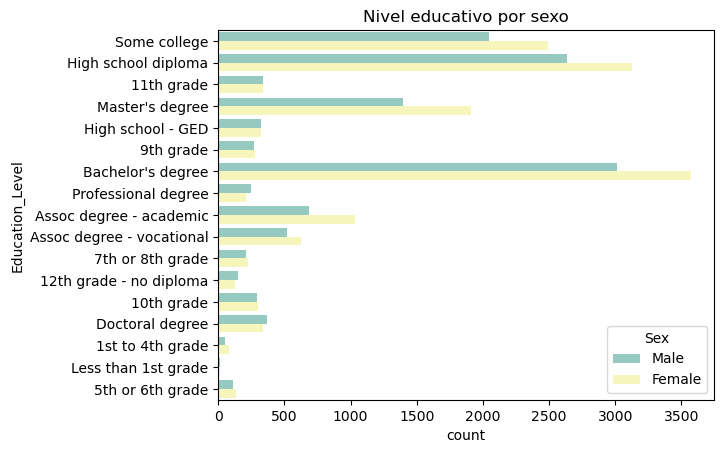

In [28]:

# Distribución del nivel educativo por sexo

sns.countplot(data=atus, 
              y='Education_Level', 
              hue='Sex', 
              palette='Set3')

plt.title('Nivel educativo por sexo')
plt.legend(title='Sex')
plt.show()

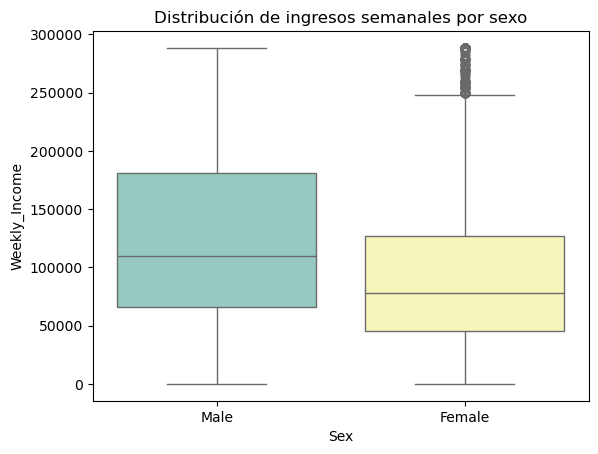

In [29]:
# Ingresos semanales por sexo
sns.boxplot(data=atus, 
            x='Sex', 
            y='Weekly_Income', 
            palette='Set3')

plt.title('Distribución de ingresos semanales por sexo')
plt.show()

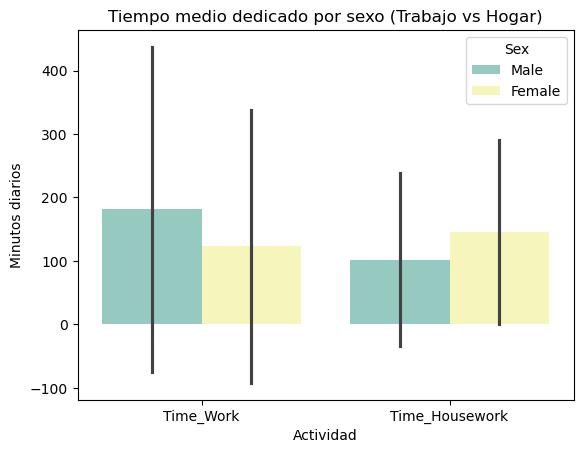

In [30]:
# Tiempo medio dedicado por sexo a trabajo y hogar
df_melted = atus.melt(id_vars='Sex', 
                      value_vars=['Time_Work', 'Time_Housework'],
                      var_name='Actividad', 
                      value_name='Minutos')


sns.barplot(data=df_melted, 
            x='Actividad', 
            y='Minutos', 
            hue='Sex', 
            ci='sd', 
            palette='Set3')

plt.title('Tiempo medio dedicado por sexo (Trabajo vs Hogar)')
plt.ylabel('Minutos diarios')
plt.xlabel('Actividad')
plt.show()

In [32]:
atus.to_csv("files/encuesta_atusdata.csv", index=False)